<a href="https://colab.research.google.com/github/YassineZITI/Chess_Prep_Dashboard/blob/main/Chess_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

in this notebook i'm gonna work with the lichess API because i have an account there and i've played a lot of games there.

# Preparing the Lichess API Package and token.

In [81]:
!pip install berserk --quiet


In [82]:
import berserk 

In [3]:
API_TOKEN='lip_3gD7WOiSA33fLaJoSojZ'
session = berserk.TokenSession(API_TOKEN)
client = berserk.Client(session=session)

In [4]:
client.account.get()

{'blocking': False,
 'count': {'ai': 130,
  'all': 11687,
  'bookmark': 5,
  'draw': 583,
  'drawH': 571,
  'import': 0,
  'loss': 5419,
  'lossH': 5344,
  'me': 0,
  'playing': 0,
  'rated': 11460,
  'win': 5685,
  'winH': 5642},
 'createdAt': datetime.datetime(2020, 3, 12, 14, 46, 27, 378000, tzinfo=datetime.timezone.utc),
 'followable': True,
 'following': False,
 'followsYou': False,
 'id': 'yas1sine',
 'online': False,
 'perfs': {'atomic': {'games': 4,
   'prog': 0,
   'prov': True,
   'rating': 1375,
   'rd': 264},
  'blitz': {'games': 6886, 'prog': 4, 'rating': 1991, 'rd': 45},
  'bullet': {'games': 3761, 'prog': 19, 'rating': 1901, 'rd': 49},
  'chess960': {'games': 33,
   'prog': -95,
   'prov': True,
   'rating': 1579,
   'rd': 117},
  'classical': {'games': 15,
   'prog': -4,
   'prov': True,
   'rating': 1690,
   'rd': 160},
  'correspondence': {'games': 1,
   'prog': 0,
   'prov': True,
   'rating': 1408,
   'rd': 303},
  'crazyhouse': {'games': 4,
   'prog': 0,
   'prov':

In [9]:
client.account.get()['count']

{'ai': 130,
 'all': 11687,
 'bookmark': 5,
 'draw': 583,
 'drawH': 571,
 'import': 0,
 'loss': 5419,
 'lossH': 5344,
 'me': 0,
 'playing': 0,
 'rated': 11460,
 'win': 5685,
 'winH': 5642}

First plot

In [10]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go


labels = ['win','draw','loss']
count = client.account.get()['count']
values = [count[l] for l in labels]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.8)])
fig

# Guetting basic information about my skills in chess

## My Elo ratings

In [13]:
yassine=client.account.get()

In [14]:
stats=yassine['perfs']
stats

{'atomic': {'games': 4, 'prog': 0, 'prov': True, 'rating': 1375, 'rd': 264},
 'blitz': {'games': 6886, 'prog': 4, 'rating': 1991, 'rd': 45},
 'bullet': {'games': 3761, 'prog': 19, 'rating': 1901, 'rd': 49},
 'chess960': {'games': 33,
  'prog': -95,
  'prov': True,
  'rating': 1579,
  'rd': 117},
 'classical': {'games': 15,
  'prog': -4,
  'prov': True,
  'rating': 1690,
  'rd': 160},
 'correspondence': {'games': 1,
  'prog': 0,
  'prov': True,
  'rating': 1408,
  'rd': 303},
 'crazyhouse': {'games': 4,
  'prog': 0,
  'prov': True,
  'rating': 1599,
  'rd': 214},
 'kingOfTheHill': {'games': 13,
  'prog': 39,
  'prov': True,
  'rating': 1571,
  'rd': 169},
 'puzzle': {'games': 4129, 'prog': 0, 'rating': 2166, 'rd': 67},
 'racer': {'runs': 10, 'score': 39},
 'racingKings': {'games': 1,
  'prog': 0,
  'prov': True,
  'rating': 1275,
  'rd': 313},
 'rapid': {'games': 677, 'prog': -37, 'rating': 2058, 'rd': 59},
 'storm': {'runs': 94, 'score': 35},
 'streak': {'runs': 26, 'score': 37},
 'ult

In [15]:
## elo for each variant
for variant in stats:
  ##we dont check the variants i dont play
  if 'games' in stats[variant]:
    games=stats[variant]['games']
    if games >100:
      print('My {} rating is: {}'.format(variant,stats[variant]['rating']))
  

My puzzle rating is: 2166
My blitz rating is: 1991
My bullet rating is: 1901
My rapid rating is: 2058


in fact i'm a good chess player ,my elo crossed the 2000 elo bar

## auther info

In [16]:
## when i start playing chess on lichess
print(yassine['createdAt'])

2020-03-12 14:46:27.378000+00:00


In [17]:
## my winnig rate
print('i played {} games on lichess'.format(yassine['count']['all']))
win_rate=round(yassine['count']['win']/yassine['count']['all'],2)
lose_rate=round(yassine['count']['loss']/yassine['count']['all'],2)
draw_rate=round(yassine['count']['draw']/yassine['count']['all'],2)
print('i won {}% of my games'.format(100*win_rate))
print('i lost {}% of my games'.format(100*lose_rate))
print('i drawn {}% of my games'.format(100*draw_rate))



i played 11687 games on lichess
i won 49.0% of my games
i lost 46.0% of my games
i drawn 5.0% of my games


# Loading And Preparing Data For Analysis


In [83]:
import pandas as pd
import numpy as np

In [84]:
# filtering the data
# filtering games played with stockfich
def filter_stockfish(my_games):
  my_games1=[]
  for i in my_games:
    try :
      i['players']['black']['user']['id']
      i['players']['white']['user']['id']
      my_games1.append(i)
    except (AttributeError,KeyError):
      continue
  return my_games1
# filtering games doesn't start
def filter_incomplete_games(my_games):
  my_games1=[]
  for i in my_games:
    try :
      i['opening']['name']
      my_games1.append(i)
    
    except (AttributeError,KeyError):
      continue
  return my_games1



In [85]:
def get_dataframe(player_id,API_TOKEN='lip_3gD7WOiSA33fLaJoSojZ',max_games=500):
    session = berserk.TokenSession(API_TOKEN)
    client = berserk.Client(session=session)
    games = list(client.games.export_by_player(player_id,max=max_games, 
     moves=False, tags=False, evals=True, opening=True))
    # keep only blitz and rapid games
    games=[i for i in games if (i['perf']=='blitz' or i['perf']=='rapid') and i['variant']=='standard']
    games=filter_stockfish(games)
    games=filter_incomplete_games(games)
    rating=[]
    color=[]
    opponent_rating=[]
    opening=[]
    Date=[]
    game_id=[]
    speed=[]
    game_ending=[]
    winner=[]
    tournament=[]
    accuracy=[]
    inaccuracy=[]
    mistake=[]
    blunder=[]
    analysis=[]
    country=[]
    opponent_id = []
    for i in games:



  
    
    
  
      Date.append(i['createdAt'].strftime('%m/%d/%Y'))
      game_id.append(i['id'])
      speed.append(i['speed'] )
      game_ending.append(i['status'])
      opening.append(i['opening']['name'])
      if i['players']['black']['user']['id']==player_id:
        opponent_id.append(i['players']['white']['user']['id'])
        color.append('black')
        rating.append(i['players']['black']['rating'])
        opponent_rating.append(i['players']['white']['rating'])
        
      if i['players']['white']['user']['id']==player_id:
        opponent_id.append(i['players']['black']['user']['id'])
        color.append('white')
        rating.append(i['players']['white']['rating'])
        opponent_rating.append(i['players']['black']['rating'])
      info=client.users.get_public_data(opponent_id[-1])

      if 'profile' in info :
        country.append(info.get('profile').get('country'))
      else:
        country.append(np.nan)
      if 'winner' in i:
        winner.append(i['winner'])
      else:
        winner.append(np.nan)
      if 'tournament' in i:
        tournament.append(True)
      else:
        tournament.append(False)
      if 'analysis' in i:
      
          



      

        # analysis
        cpl=''
        eval=i['analysis']
        for j in eval:
          if type(j)==dict:
            if 'eval'in j:
              cpl+=str(j['eval'])+' '
        analysis.append(cpl)

      

        if i['players']['black']['user']['id']==player_id:
          accuracy.append(i['players']['black']['analysis']['acpl'])
          inaccuracy.append(i['players']['black']['analysis']['inaccuracy'])
          mistake.append(i['players']['black']['analysis']['mistake'])
          blunder.append(i['players']['black']['analysis']['blunder'])

        else:
          accuracy.append(i['players']['white']['analysis']['acpl'])
          inaccuracy.append(i['players']['white']['analysis']['inaccuracy'])
          mistake.append(i['players']['white']['analysis']['mistake'])
          blunder.append(i['players']['white']['analysis']['blunder'])
      else:
        analysis.append(np.nan)
        accuracy.append(np.nan)
        inaccuracy.append(np.nan)
        mistake.append(np.nan)
        blunder.append(np.nan)
    data={'game_id':game_id,
      'Date':Date,
      'tournament':tournament,
      'speed':speed,
      'opening':opening,
      'color':color,
      'rating':rating,
      'opponent_rating':opponent_rating,
      'game_ending':game_ending,
      'winner':winner,
      'analysis':analysis,
      'accuracy':accuracy,
      'inaccuracy':inaccuracy,
      'mistake':mistake,
      'blunder':blunder,
      'country':country}
    return pd.DataFrame(data)

In [87]:
df = get_dataframe('cambrola',max_games=300)
#cambrola is an egyptian streamer

In [89]:

df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y')
df.drop(['game_id','opponent_rating','analysis'],axis=1,inplace=True)

df.opening=df.opening.str.split(':').str[0]
df.winner=df.winner.fillna('draw')
openings=list(df.opening.unique())
df['wining']=df.winner
for i in range(len(df)):
    if df.at[i,'winner']=='draw':
        continue
    elif df.at[i,'winner']==df.at[i,'color']:
        df.at[i,'wining']='won'
    else:
        df.at[i,'wining']='lost'


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         30 non-null     datetime64[ns]
 1   tournament   30 non-null     bool          
 2   speed        30 non-null     object        
 3   opening      30 non-null     object        
 4   color        30 non-null     object        
 5   rating       30 non-null     int64         
 6   game_ending  30 non-null     object        
 7   winner       30 non-null     object        
 8   accuracy     2 non-null      float64       
 9   inaccuracy   2 non-null      float64       
 10  mistake      2 non-null      float64       
 11  blunder      2 non-null      float64       
 12  country      8 non-null      object        
 13  wining       30 non-null     object        
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 3.2+ KB


In [91]:
df

,Date,tournament,speed,opening,color,rating,game_ending,winner,accuracy,inaccuracy,mistake,blunder,country,wining
0,2022-07-23,False,blitz,Old Indian Defense,white,1990,outoftime,black,NaN,NaN,NaN,NaN,LB,lost
1,2022-07-23,False,blitz,Benko Gambit,white,1980,mate,white,NaN,NaN,NaN,NaN,NaN,won
2,2022-07-23,False,blitz,Pirc Defense,black,1979,mate,black,NaN,NaN,NaN,NaN,NaN,won
3,2022-07-23,False,blitz,Indian Defense,white,1982,resign,black,NaN,NaN,NaN,NaN,CL,lost
4,2022-07-23,False,blitz,Modern Defense,black,1979,mate,black,NaN,NaN,NaN,NaN,NaN,won
5,2022-07-23,False,blitz,Borg Defense,black,1974,resign,black,NaN,NaN,NaN,NaN,NaN,won
6,2022-07-23,False,blitz,King's Indian Defense,white,1965,resign,black,NaN,NaN,NaN,NaN,NaN,lost
7,2022-07-23,False,blitz,Borg Defense,black,1985,resign,white,NaN,NaN,NaN,NaN,NaN,lost
8,2022-07-23,False,blitz,Pirc Defense,black,1980,resign,black,NaN,NaN,NaN,NaN,NaN,won
9,2022-07-23,False,blitz,Queen's Gambit Declined,white,1961,resign,white,NaN,NaN,NaN,NaN,NaN,won


In [60]:
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y')
df.head(2)

,Date,tournament,speed,opening,color,rating,game_ending,winner,accuracy,inaccuracy,mistake,blunder,country,wining
0,2022-07-23,False,blitz,Indian Defense,black,2158,resign,black,NaN,NaN,NaN,NaN,JM,won
1,2022-07-23,False,blitz,Pirc Defense,black,2162,outoftime,white,93.0,4.0,1.0,7.0,NaN,lost


# Visualisations

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

### rating developpement over the time

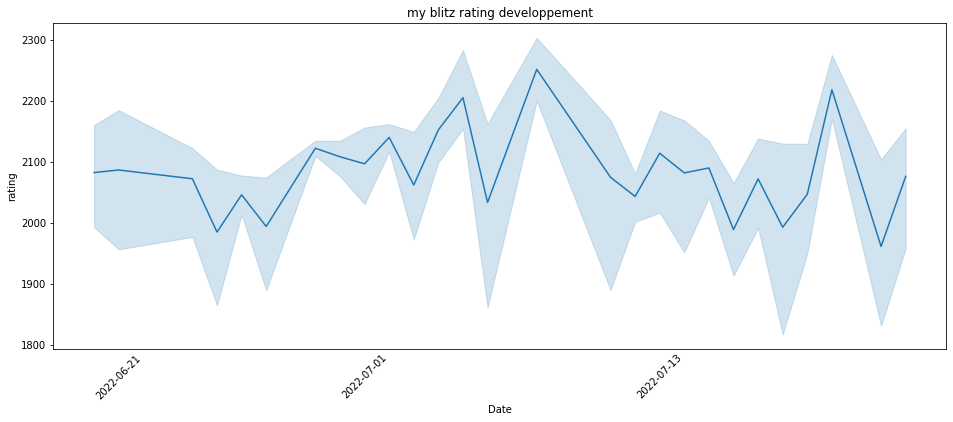

In [62]:
###blitz rating
blitz=df[df['speed']=='blitz'][['Date','rating']].sort_values('Date')

fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=blitz, x='Date', y='rating')
plt.title('my blitz rating developpement')
every_nth = 3
ax.tick_params(axis='x', which='both',rotation=45, length=0)
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


openings and with wich one win more

In [64]:
df['wining']=df['color']==df['winner']

In [65]:
data=df.groupby(['opening'])['wining'].mean()
data

opening
Alekhine Defense                   1.000000
Benoni Defense                     0.846154
Bird Opening                       0.694444
Caro-Kann Defense                  0.571429
Dutch Defense                      0.909091
East Indian Defense                1.000000
English Opening                    0.454545
Englund Gambit                     1.000000
Englund Gambit Complex             0.333333
Englund Gambit Complex Declined    1.000000
Englund Gambit Declined            0.500000
Four Knights Game                  0.000000
French Defense                     0.604167
Grünfeld Defense                   0.000000
Horwitz Defense                    0.800000
Indian Defense                     0.615385
Italian Game                       1.000000
King's Gambit                      0.900000
King's Gambit Accepted             0.687500
King's Gambit Declined             0.500000
King's Indian Attack               1.000000
King's Indian Defense              0.666667
King's Pawn             

let's remove the openings wich he doesn't play that much maybe an opponent forces him to play it

In [66]:
data=df.copy()
data.opening=data.opening.str.split(':').str[0]
df.opening=df.opening.str.split(':').str[0]

data=data.groupby(['opening'])['wining'].agg(['mean','count']).sort_values('count',ascending=False)[:20]



data.reset_index(inplace=True)
data


,opening,mean,count
0,Bird Opening,0.694444,72
1,Sicilian Defense,0.564516,62
2,French Defense,0.604167,48
3,Pirc Defense,0.684211,38
4,Scandinavian Defense,0.687500,16
5,King's Gambit Accepted,0.687500,16
6,Queen's Pawn Game,0.666667,15
7,Caro-Kann Defense,0.571429,14
8,Rat Defense,0.846154,13
9,Benoni Defense,0.846154,13


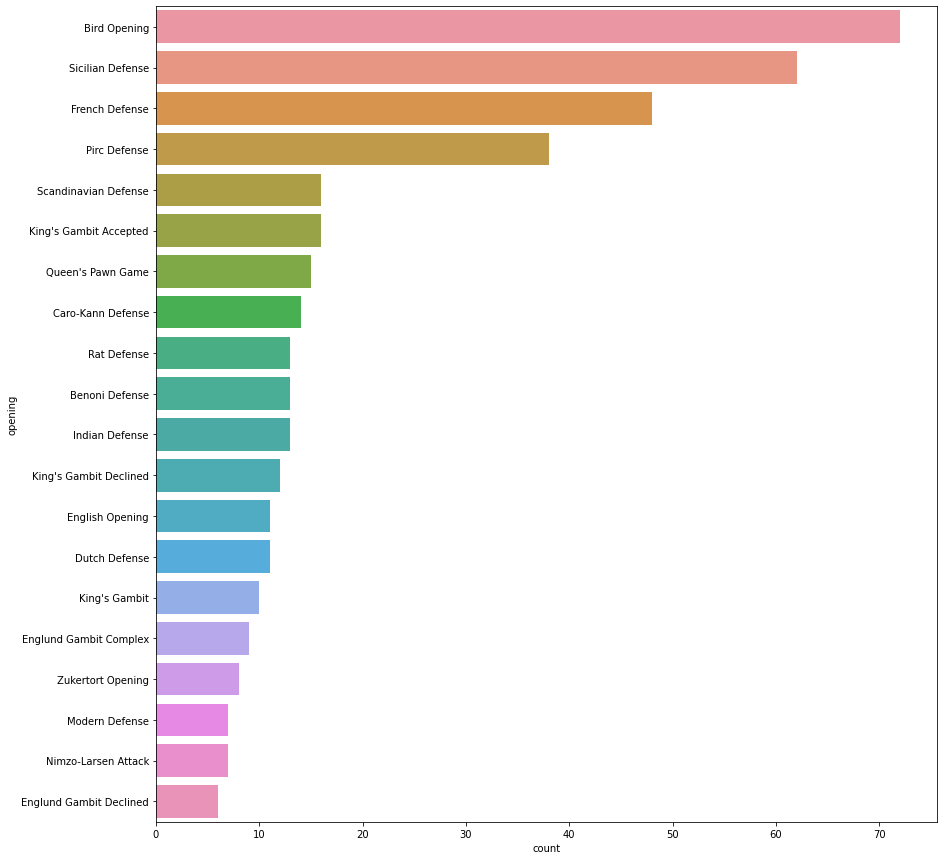

In [68]:
##opening by count
plt.figure(figsize=(14,15))
sns.barplot(y='opening',x='count',data=data)


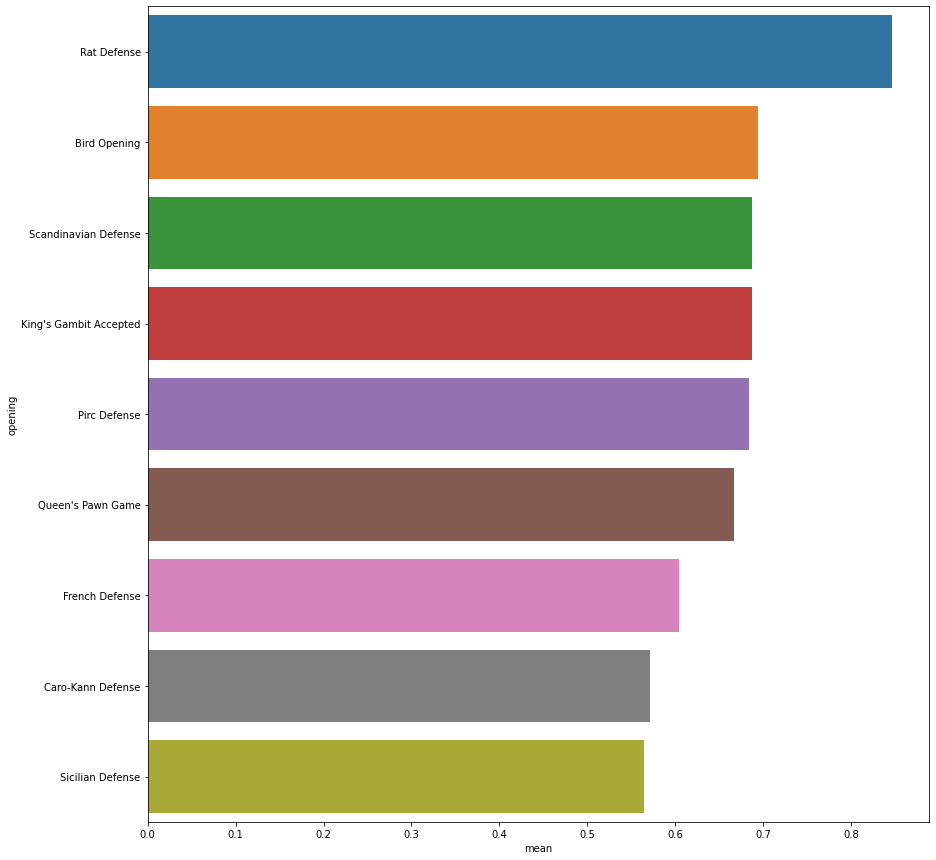

In [69]:
data=data[:9].sort_values('mean',ascending=False)
plt.figure(figsize=(14,15))
sns.barplot(y='opening',x='mean',data=data)

###  Accuracy 

In [70]:
## first let' retrive the accuracy data
## because he didn't analys each game he played we will visualize
## the average accuracy each month and we hope that he analysed at least one game each month
look_up = {'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May',
            '6': 'Jun', '7': 'Jul', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
def month(row):
  date=str(row)
  return look_up[date]
data=df.copy()
data=data[data['Date'].dt.year==2022].sort_values('Date')
data['month']=data['Date'].dt.month
data=data.groupby(['month'])[['accuracy']].mean().reset_index()
data['month'] = data['month'].apply(month)
data

,month,accuracy
0,Jun,59.833333
1,Jul,63.252874


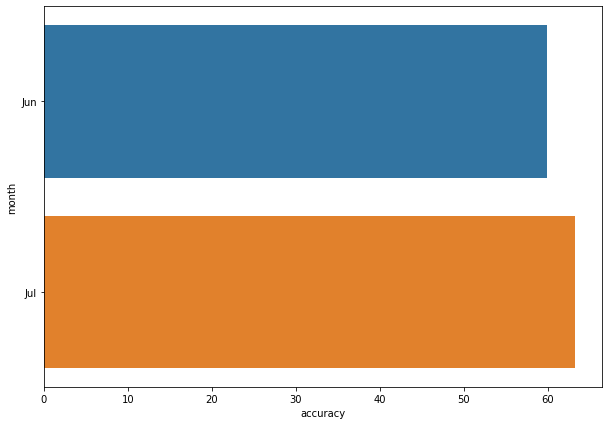

In [71]:
### lichess call accuracy acpl"Average centipawn loss".
### if we divide it by 100 will give us the averge pawn we lose every move.
plt.figure(figsize=(10,7))
sns.barplot(x='accuracy',y='month',data=data)

### opponents on the map
we will plot a choropleth map for visualizing how many opponents he played in each country.

In [72]:
# in my geojson file the countries presented by name
# let's transform our dataframe to the same.
from bs4 import BeautifulSoup
import requests
html=requests.get('https://www.iban.com/country-codes')
soup=BeautifulSoup(html.text,'html.parser')
table=soup.find('table')
mapping=dict()
for i in soup.find_all('tr')[1:]:
  cols=i.find_all('td')
  mapping[cols[1].text]=cols[0].text

In [73]:
df.country=df.country.map(mapping)
df.country

0           Jamaica
1               NaN
2           Tunisia
3               NaN
4             Egypt
           ...     
455           Egypt
456    Saudi Arabia
457             NaN
458             NaN
459             NaN
Name: country, Length: 460, dtype: object

In [74]:
#geojson file 

import json
world_geo=r'/content/world_countries.json'

# open the json file - json.load() methods returns a python dictionary
with open(world_geo) as geo_file:
    countries_json = json.load(geo_file)

In [75]:
# prepare the data for viz
data=df.groupby(['country']).size().reset_index()
data.columns=['country','count']

for i in countries_json['features']:
  if i['properties']['name'] not in data.country.values:
    data.loc[len(data.index)]=[i['properties']['name'],0]

In [76]:
data

,country,count
0,Algeria,19
1,Antarctica,1
2,Argentina,5
3,Bangladesh,1
4,Belarus,2
...,...,...
182,Vietnam,0
183,Vanuatu,0
184,West Bank,0
185,Zambia,0


In [77]:
#create a map using folium library
import folium
world_map=folium.Map(zoom_start=8,tiles='Mapbox Bright')

#let's generate our choropleth map 

world_map.choropleth(geo_data=countries_json,
                     data=data,
                     columns=['country','count'],
                     key_on='feature.properties.name',
                     bins=[0,1,5,10,20,100],
                     fill_color='YlOrRd',
                     line_opacity=0.3,

                     )
world_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.

